In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [15]:
import pandas as pd
df = pd.read_csv('apple.csv')


In [16]:
 df.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/03/2023,$192.46,31346600,$193.78,$193.88,$191.76
1,06/30/2023,$193.97,85213220,$191.63,$194.48,$191.26
2,06/29/2023,$189.59,46347310,$189.08,$190.07,$188.94
3,06/28/2023,$189.25,51216800,$187.93,$189.90,$187.60
4,06/27/2023,$188.06,50730850,$185.89,$188.39,$185.67


In [17]:
df = df[['Date', 'Close/Last']]
df.head()

,Date,Close/Last
0,07/03/2023,$192.46
1,06/30/2023,$193.97
2,06/29/2023,$189.59
3,06/28/2023,$189.25
4,06/27/2023,$188.06


In [18]:
df = df.replace({'\$':''}, regex = True)

In [19]:
df.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [20]:
df.columns


Index(['Date', 'Close'], dtype='object')

In [21]:
df = df.astype({"Close": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [22]:
df.index = df['Date']

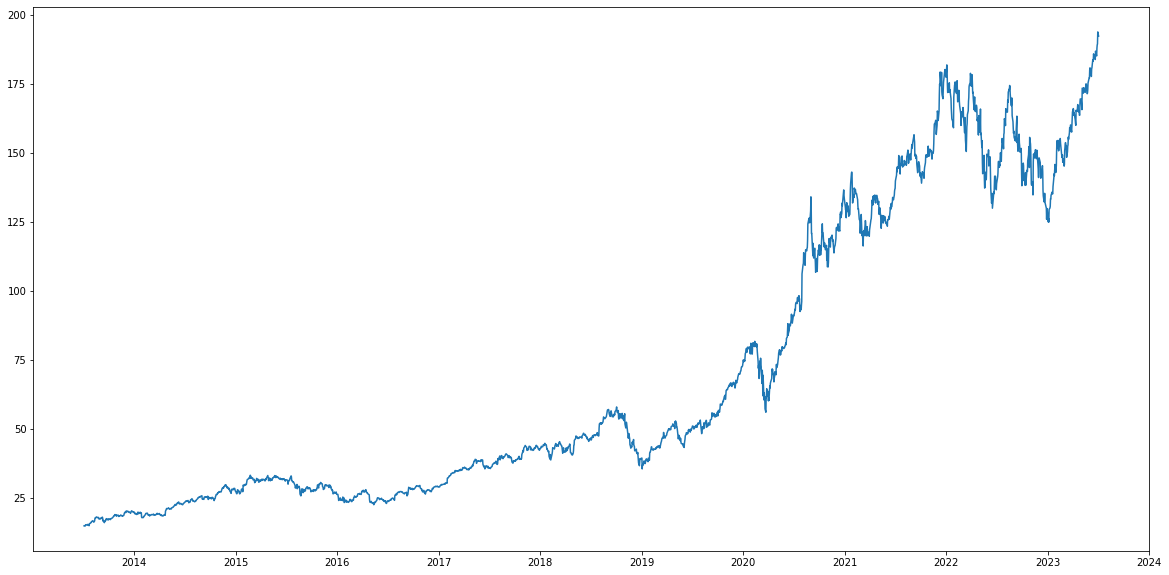

In [23]:
plt.plot(df["Close"],label='Close Price history')

In [24]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close"][i]
data.head()

,Date,Close
0,2013-07-05 00:00:00,14.9079
1,2013-07-08 00:00:00,14.8232
2,2013-07-09 00:00:00,15.0839
3,2013-07-10 00:00:00,15.0261
4,2013-07-11 00:00:00,15.2603


In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [27]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [32]:


X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [33]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

73/73 [==============================] - 1s 6ms/step


/var/folders/wd/gc5_ys7n7tgb_46xz8rx1nww0000gp/T/ipykernel_6406/4050331063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


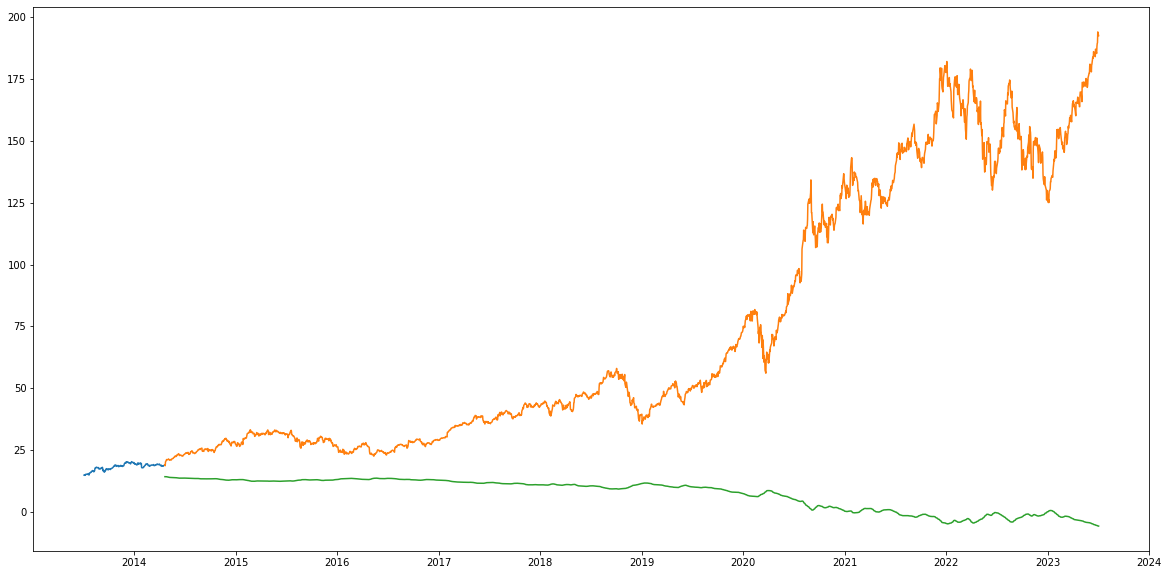

In [36]:
#lstm_model.compile(loss=’mean_squared_error’,optimizer=’adam’)
#lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])